<a href="https://colab.research.google.com/github/rdkdaniel/NLP-Projects/blob/main/A_Variety_of_NLP_Techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Rev the Engines**

**Table of Content**

1. Sentiment Analysis
2. Named Entity Recognition (NER)
3. Stemming
4. Lemmatization
5. Bag of Words (BoW)
6. Term Frequency–Inverse Document Frequency (TF-IDF)
7. Wordcloud






# **0.0 Prep**

## **0.1 Data**

In [1]:
#Connecting colab with kaggle to get the data
#Install the Kaggle library
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
#Make a directory named “.kaggle”
! mkdir ~/.kaggle

In [3]:
#Copy the “kaggle.json” into this new directory
! cp kaggle.json ~/.kaggle/

In [4]:
#Allocate the required permission for this file
! chmod 600 ~/.kaggle/kaggle.json

In [5]:
#Downloading dataset
! kaggle datasets download ekrembayar/avatar-the-last-air-bender

  0% 0.00/0.99M [00:00<?, ?B/s]
100% 0.99M/0.99M [00:00<00:00, 107MB/s]


## **0.2 Unzipping the dataset**

In [6]:
!unzip avatar-the-last-air-bender

Archive:  avatar-the-last-air-bender.zip
  inflating: avatar.csv              
  inflating: avatar_data.csv         
  inflating: scenes.csv              
  inflating: series_names.csv        


# **1.0 Sentiment Analysis**

## **1.1 Libraries**

In [7]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

## **1.2 Reading and Wragling data**

In [13]:
df_avatar = pd.read_csv('avatar.csv', encoding = 'ISO-8859-1', engine='python')
df_avatar_lines = df_avatar.groupby('character').count()
df_avatar_lines = df_avatar_lines.sort_values(by=['character_words'], ascending=False)[:10]
top_character_names = df_avatar_lines.index.values

*   *Below error was observed in the code above. Fix was specify the exact type of encoding to python 3.*
*   *i.e. "encoding = 'ISO-8859-1'"*

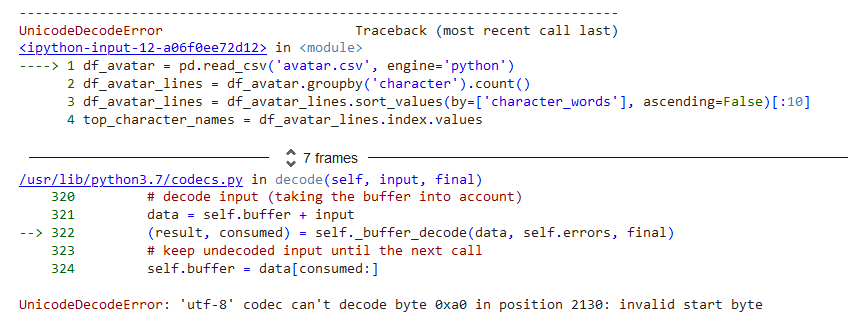



## **1.3 Filtering oOut Non-top Characters**

In [14]:
df_character_sentiment = df_avatar[df_avatar['character'].isin(top_character_names)]
df_character_sentiment = df_character_sentiment[['character', 'character_words']]

## **1.4 Calculating Sentiment Score**

In [16]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [17]:
sid = SentimentIntensityAnalyzer()
df_character_sentiment.reset_index(inplace=True, drop=True)
df_character_sentiment[['neg', 'neu', 'pos', 'compound']] = df_character_sentiment['character_words'].apply(sid.polarity_scores).apply(pd.Series)
df_character_sentiment

,character,character_words,neg,neu,pos,compound
0,Katara,Water. Earth. Fire. Air. My grandmother used t...,0.196,0.735,0.069,-0.9718
1,Sokka,It's not getting away from me this time. Watc...,0.000,1.000,0.000,0.0000
2,Katara,"Sokka, look!",0.000,1.000,0.000,0.0000
3,Sokka,"Sshh! Katara, you're going to scare it away. ...",0.200,0.800,0.000,-0.5411
4,Katara,"But, Sokka! I caught one!",0.000,1.000,0.000,0.0000
...,...,...,...,...,...,...
7053,Zuko,At least you don't look like a boar-q-pine! My...,0.183,0.817,0.000,-0.4007
7054,Suki,And why did you paint me firebending?,0.000,1.000,0.000,0.0000
7055,Sokka,I thought it looked more exciting that way. O...,0.000,0.687,0.313,0.7501
7056,Iroh,"Hey, my belly's not that big anymore. I've rea...",0.000,1.000,0.000,0.0000




*  *Below error was observed in the code above. Fix was to get the "vader.lexicon" dependency from ntlk.*
* i.e. * nltk.download('vader_lexicon')*

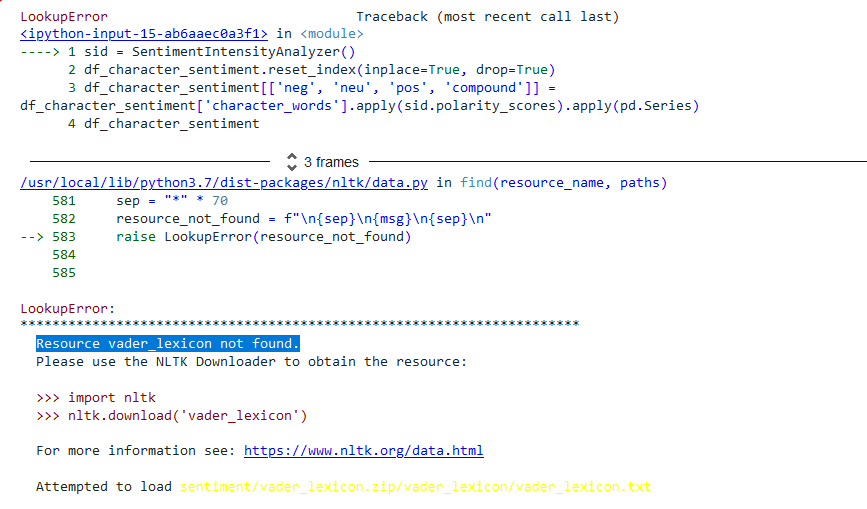


# **2.0 Named Entity Recognition (NER)**

## **2.1 Libraries**

In [18]:
import spacy

## **2.2 Applying NLP**

In [20]:
nlp = spacy.load("en_core_web_sm")
doc = nlp("Biden invites Ukrainian president to White House this summer")
print([(X.text, X.label_) for X in doc.ents])

[('Biden', 'PERSON'), ('Ukrainian', 'NORP'), ('White House', 'ORG'), ('this summer', 'DATE')]


# **3.0 Stemming & Lemmatization**

## **3.1 Libraries**

In [21]:
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer

In [23]:
# PorterStemmer
porter = PorterStemmer()
# LancasterStemmer
lancaster = LancasterStemmer()
print(porter.stem("friendship"))
print(lancaster.stem("friendship"))

friendship
friend


## **3.1.0 More Libraries**

In [24]:
from nltk import WordNetLemmatizer

In [27]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [29]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [30]:
lemmatizer = WordNetLemmatizer()
words = ['articles', 'friendship', 'studies', 'phones']
for word in words:
    print(lemmatizer.lemmatize(word))

article
friendship
study
phone




*  *Below error was observed in the code above. Fix was to get the "wordnet" dependency from ntlk.*
*   i.e. * "nltk.download('wordnet')"*
*   *Same applied for "omw-1.4"*
*   List item



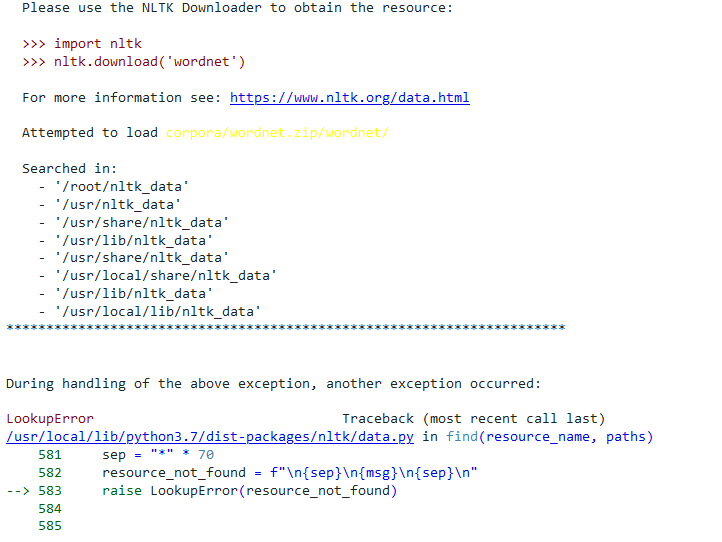



## **3.1.1 More Libararies**

In [32]:
from nltk import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [34]:
words = ['be', 'is', 'are', 'were', 'was']
for word in words:
    print(lemmatizer.lemmatize(word, pos='v'))

be
be
be
be
be


# **4.0 Bag of Words**

In [ ]:
#https://towardsdatascience.com/7-nlp-techniques-you-can-easily-implement-with-python-dc0ade1a53c2

## **4.1 Libraries**

In [35]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

## **4.2 Implementation**

In [38]:
text = ["I love writing code in Python. I love Python code",
        "I hate writing code in Java. I hate Java code"]
df = pd.DataFrame({'review': ['review1', 'review2'], 'text':text})
cv = CountVectorizer(stop_words='english')
cv_matrix = cv.fit_transform(df['text'])
df_dtm = pd.DataFrame(cv_matrix.toarray(),
                      index=df['review'].values,
                      columns=cv.get_feature_names())
df_dtm

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,code,hate,java,love,python,writing
review1,2,0,0,2,2,1
review2,2,2,2,0,0,1


# **5.0 Term Frequency–Inverse Document Frequency (TF-IDF)**

## **5.1 Libraries**

In [39]:
import pandas as pd

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer
text = ["I love writing code in Python. I love Python code",
        "I hate writing code in Java. I hate Java code"]
df = pd.DataFrame({'review': ['review1', 'review2'], 'text':text})
tfidf = TfidfVectorizer(stop_words='english', norm=None)
tfidf_matrix = tfidf.fit_transform(df['text'])
df_dtm = pd.DataFrame(tfidf_matrix.toarray(),
                      index=df['review'].values,
                      columns=tfidf.get_feature_names())
df_dtm

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,code,hate,java,love,python,writing
review1,2.0,0.00000,0.00000,2.81093,2.81093,1.0
review2,2.0,2.81093,2.81093,0.00000,0.00000,1.0


# **6.0 Wordcloud**

## **6.1 Libraries**

In [43]:
pip install stylecloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 262 kB 29.6 MB/s 
     |████████████████████████████████| 161 kB 56.8 MB/s 
     |████████████████████████████████| 87 kB 7.1 MB/s 
     |████████████████████████████████| 87 kB 9.0 MB/s 
  Created wheel for stylecloud: filename=stylecloud-0.5.2-py3-none-any.whl size=259508 sha256=ee9d1b2aba7e2ad649f17cfc0f913d02c8365b3eb8d98677a44c31c1a440a345
  Stored in directory: /root/.cache/pip/wheels/77/42/7a/f52b5f84c04196fd4c2a3dceeb1bbeaee1c93a4fe271b5eb41
  Created wheel for fire: filename=fire-0.4.0-py2.py3-none-any.whl size=115942 sha256=b01bd899608d05c176776aa74124b56703bf06c7ca168ad1c2033abb8e3ac7a0
  Stored in directory: /root/.cache/pip/wheels/8a/67/fb/2e8a12fa16661b9d5af1f654bd199366799740a85c64981226
  Created wheel for tinycss: filename=tinycss-0.4-py3-none-any.whl size=43955 sha256=6f95603ac7b82a1b600f208a3ab88b85b2410e2f322d911bd6951e1fd014c1e0

In [44]:
import stylecloud

In [47]:
stylecloud.gen_stylecloud(file_path='SJ-Speech.txt',
                          icon_name= "fas fa-apple-alt")



*   The image from the code above is not automatically rendered. Instead, it is generated in the colab files section [pic below]
*   ***Note to self: Could this be the same with the penumonia work on computer vision where the images were not generated? Maybe they were generated in the environment but not rendered?***

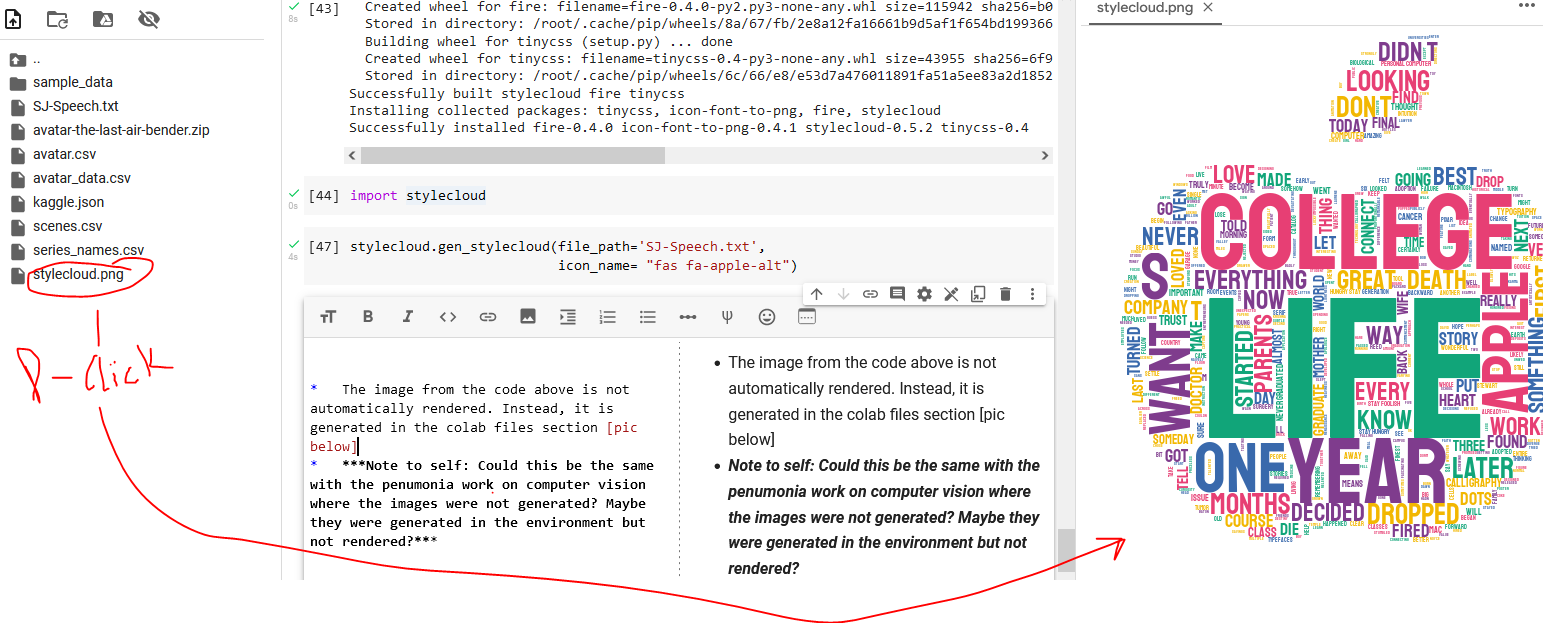

